<a href="https://colab.research.google.com/github/Nyauntu/Amazon_externship/blob/main/Copy_of_Keyword_analysis_YouTube_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud

df = pd.read_csv("/content/sample_data/YouTube_cleaned.csv")


In [ ]:
print(df.head())

   Unnamed: 0  S No.                                              Link  \
0           0      1  https://youtu.be/bU1xOB4oT8E?si=IJAm80elNe5WXDbR   
1           1      2  https://youtu.be/G7x3WvBNfuE?si=nKvtQDzdT35tGPlm   
2           2      3  https://youtu.be/UkmziWDrolo?si=_noO5pzp8SBKEpY4   
3           3      4  https://youtu.be/-Uwcl9UsO9g?si=UL8lkmTIpwNt6eOQ   
4           4      5  https://youtu.be/_nKJ1N5jj_8?si=gtL0gjple3bPhd5A   

     Upload Date  Views  Likes  Comments  \
0       Jan 2025    955   80.0        42   
1    Jan 22 2025    142   31.0        35   
2  March 17 2025   3481   68.0        15   
3   Jan 25, 2025   1756    NaN        39   
4    June 8 2025    167    7.0         3   

                                     Transcript link  \
0                          https://shorturl.at/FBQ7z   
1                          https://shorturl.at/hAiFA   
2                          https://shorturl.at/6yp9E   
3  https://docs.google.com/document/d/1qdvemZ0SBG...   
4  https:/

In [ ]:
stop_keywords = ['team', 'company', 'job', 'work', 'amazon', 'warehouse']


In [ ]:
import re

def tokenize(text):
    # Split by whitespace
    words = text.split()
    cleaned_words = []
    for word in words:
        # Keep URLs intact
        if re.match(r'https?://\S+', word):
            cleaned_words.append(word.lower())
        else:
            # Remove punctuation at start/end
            word = re.sub(r'^[.,\\!?;:]+|[.,\\!?;:]+$', '', word)
            if word:
                cleaned_words.append(word.lower())
    return cleaned_words


In [ ]:
df["Transcript_tokens"] = df["Transcript_cleaned"].apply(tokenize)
df.head()


,Unnamed: 0,S No.,Link,Upload Date,Views,Likes,Comments,Transcript link,Transcript,Tone,Transcript_cleaned,Transcript_tokens
0,0,1,https://youtu.be/bU1xOB4oT8E?si=IJAm80elNe5WXDbR,Jan 2025,955,80.0,42,https://shorturl.at/FBQ7z,why I hate my job. But if I’m going to spend 4...,Negative,hate job i’m going spend 40–50 hours week some...,"[hate, job, i’m, going, spend, 40–50, hours, w..."
1,1,2,https://youtu.be/G7x3WvBNfuE?si=nKvtQDzdT35tGPlm,Jan 22 2025,142,31.0,35,https://shorturl.at/hAiFA,working overnight how that feels at a warehous...,Negative,working overnight feels warehouse third shifti...,"[working, overnight, feels, warehouse, third, ..."
2,2,3,https://youtu.be/UkmziWDrolo?si=_noO5pzp8SBKEpY4,March 17 2025,3481,68.0,15,https://shorturl.at/6yp9E,What a day...So this brings me to the end of t...,Tired,dayso brings end beautiful shift im tired feet...,"[dayso, brings, end, beautiful, shift, im, tir..."
3,3,4,https://youtu.be/-Uwcl9UsO9g?si=UL8lkmTIpwNt6eOQ,"Jan 25, 2025",1756,NaN,39,https://docs.google.com/document/d/1qdvemZ0SBG...,I want to talk about Amazon and what it's like...,Negative,want talk amazon like work warehouse reason le...,"[want, talk, amazon, like, work, warehouse, re..."
4,4,5,https://youtu.be/_nKJ1N5jj_8?si=gtL0gjple3bPhd5A,June 8 2025,167,7.0,3,https://docs.google.com/document/d/1mE1IEHl5vo...,"Working at Amazon, this is the most weight you...",Negative,working amazon weight youre going lose like yo...,"[working, amazon, weight, youre, going, lose, ..."


In [ ]:
from collections import Counter

all_words = [word for tokens in df["Transcript_tokens"] for word in tokens]
word_counts = Counter(all_words)

# Convert to DataFrame
df_word_counts = pd.DataFrame(word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)
df_word_counts.head(10)


,word,count
12,like,247
606,yall,52
14,amazon,37
69,work,34
27,get,31
48,day,27
145,it’s,26
128,youre,26
137,working,24
3,going,24


In [ ]:
df.to_csv("YouTube_with_tokens.csv", index=False)
df_word_counts.to_csv("YouTube_word_counts.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


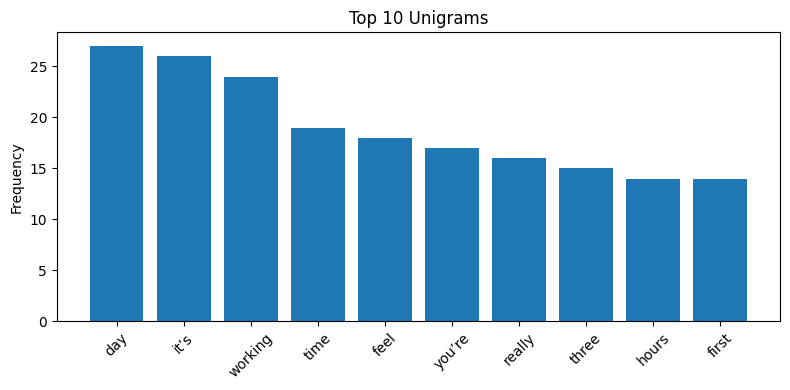

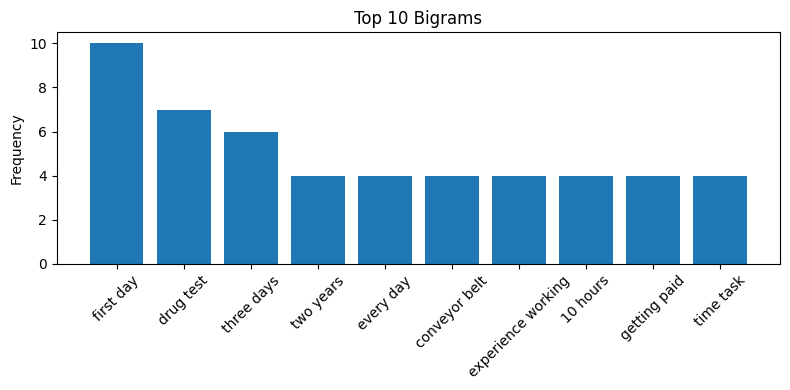

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk import bigrams
import matplotlib.pyplot as plt
import nltk

# First-time only: download stopwords list
nltk.download('stopwords')

# Step 1: Get stopwords + add custom unwanted words
stop_words = set(stopwords.words('english'))
custom_unwanted = {
    'team', 'company', 'job', 'work', 'amazon', 'warehouse', 'get', 'associate',
    'yall', "you're", 'gonna', 'aint', 'im', 'dont', 'didnt', 'yeah', 'oh', 'uh', 'um',
    'ya', 'like', 'ok', 'okay', 'right', 'alright', 'thing', 'things', 'lot','youre','go','going','basically','thats'
}
stop_words.update(custom_unwanted)

# Step 2: Tokenize the vlog transcript into words
all_words = ' '.join(df['Transcript_cleaned']).split()

# Step 3: Filter out stopwords
filtered_words = [word for word in all_words if word.lower() not in stop_words]

# Step 4: Count unigrams
unigram_counts = Counter(filtered_words)

# Step 5: Count bigrams (two consecutive words) from the filtered words
bigram_list = list(bigrams(filtered_words))
bigram_counts = Counter(bigram_list)

# Step 6: Plot top 10 unigrams
top_unigrams = unigram_counts.most_common(10)
u_words, u_counts = zip(*top_unigrams)

plt.figure(figsize=(8,4))
plt.bar(u_words, u_counts)
plt.title("Top 10 Unigrams")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 7: Plot top 10 bigrams
top_bigrams = bigram_counts.most_common(10)
b_words, b_counts = zip(*top_bigrams)
b_words_str = [' '.join(pair) for pair in b_words]

plt.figure(figsize=(8,4))
plt.bar(b_words_str, b_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



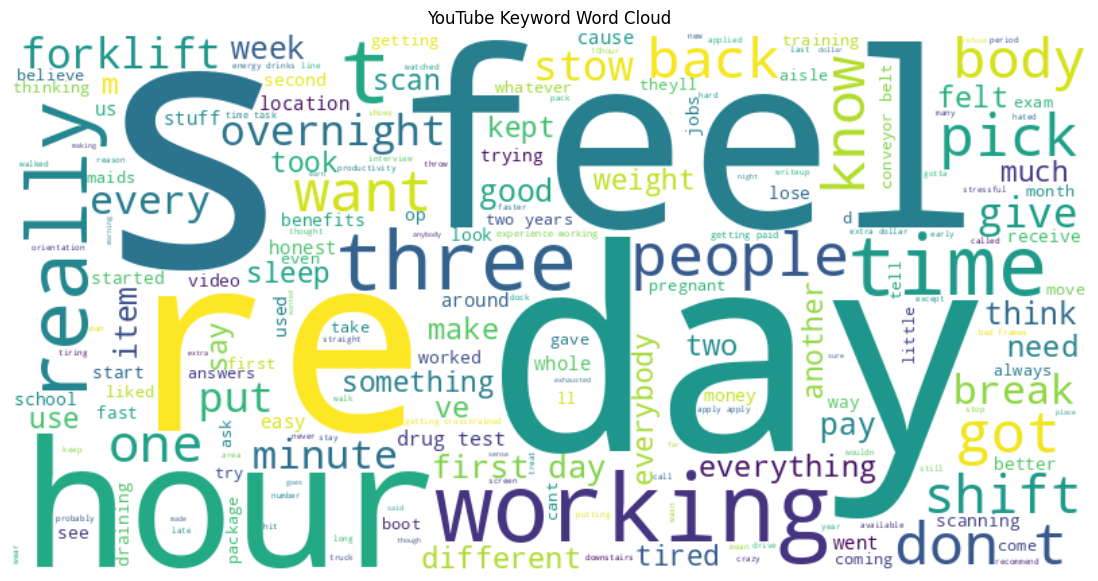

In [ ]:
# Creating word cloud for YouTube comments
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(filtered_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("YouTube Keyword Word Cloud")
plt.show()
